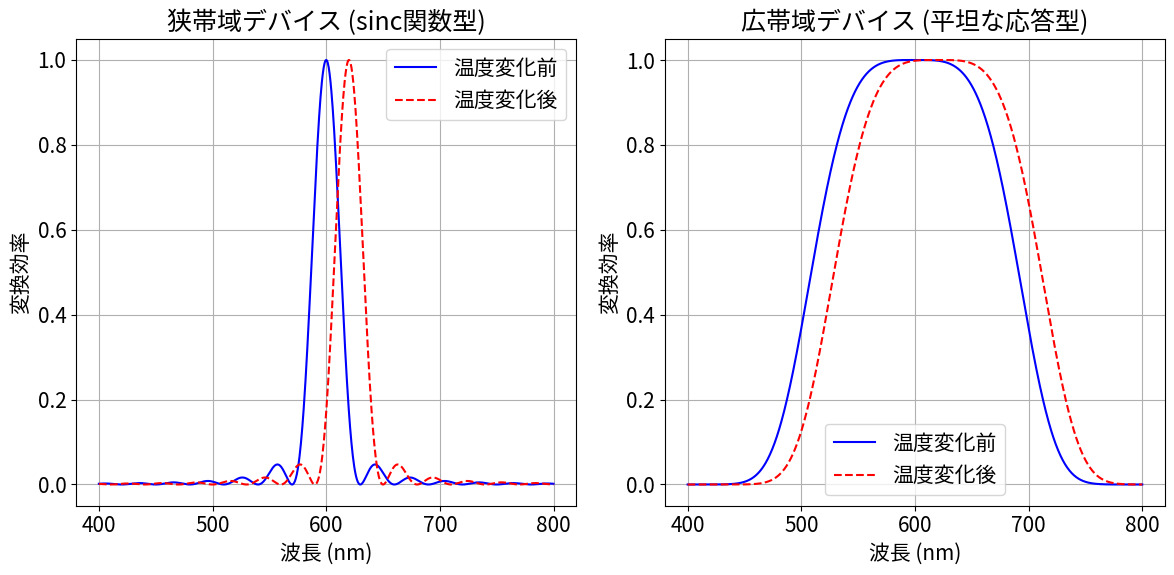

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

# 現在のフォントサイズを取得
current_font_size = mpl.rcParams['font.size']

# フォントサイズを1.5倍に設定
mpl.rcParams['font.size'] = current_font_size * 1.5

# フォントファミリーを設定
mpl.rcParams['font.family'] = 'Noto Sans CJK JP'

# パラメータ設定
wavelength = np.linspace(400, 800, 1000)  # 波長範囲: 400 nm ～ 800 nm
center_wavelength_narrow = 600  # 狭帯域デバイスの中心波長
center_wavelength_wide = 600    # 広帯域デバイスの中心波長
temperature_shift = 20  # 温度変化による波長シフト (nm)

# 狭帯域デバイスの応答 (sinc関数型)
def narrow_band_response(wavelength, center):
    return np.sinc((wavelength - center) / 30)**2  # sinc関数の二乗で応答をモデル化

# 広帯域デバイスの応答 (平坦な応答型)
def wide_band_response(wavelength, center):
    return np.exp(-((wavelength - center) / 100)**4)  # 広がりのあるガウシアン型

# 温度変化前後の応答を計算
narrow_response_before = narrow_band_response(wavelength, center_wavelength_narrow)
narrow_response_after = narrow_band_response(wavelength, center_wavelength_narrow + temperature_shift)

wide_response_before = wide_band_response(wavelength, center_wavelength_wide)
wide_response_after = wide_band_response(wavelength, center_wavelength_wide + temperature_shift)

# プロット
plt.figure(figsize=(12, 6))

# 狭帯域デバイスの応答
plt.subplot(1, 2, 1)
plt.plot(wavelength, narrow_response_before, label='温度変化前', color='blue')
plt.plot(wavelength, narrow_response_after, label='温度変化後', color='red', linestyle='--')
plt.title('狭帯域デバイス (sinc関数型)')
plt.xlabel('波長 (nm)')
plt.ylabel('変換効率')
plt.legend()
plt.grid(True)

# 広帯域デバイスの応答
plt.subplot(1, 2, 2)
plt.plot(wavelength, wide_response_before, label='温度変化前', color='blue')
plt.plot(wavelength, wide_response_after, label='温度変化後', color='red', linestyle='--')
plt.title('広帯域デバイス (平坦な応答型)')
plt.xlabel('波長 (nm)')
plt.ylabel('変換効率')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()